## Kütüphaneler Dahil Ediliyor

In [48]:
## Libraries are included
from IPython.core.interactiveshell import InteractiveShell   
InteractiveShell.ast_node_interactivity="all"   #With this sentence, each print process can be printed without print function.

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataframe şeklinde veri yazdırılıyor

In [49]:
## Data is printed in the form of dataframe
df=pd.read_csv("VBT_Diyabet_Veriler2.csv")
df

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,2,119,0.0,19.6,72,0.0
1,4,145,0.0,32.5,70,1.0
2,5,132,0.0,26.8,69,0.0
3,5,136,0.0,0.0,69,0.0
4,8,91,0.0,35.6,68,0.0
...,...,...,...,...,...,...
756,1,89,25.0,27.8,21,0.0
757,0,94,115.0,43.5,21,0.0
758,1,114,200.0,38.1,21,0.0
759,0,126,120.0,27.4,21,0.0


## Keşif Veri Analizi (EDA) işlemleri yapılıyor

In [50]:
df.info() ## Exploratory Data Analysis (EDA) operations are done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pregnancies  761 non-null    int64  
 1   Glucose      761 non-null    int64  
 2   Insulin      761 non-null    float64
 3   BMI          761 non-null    float64
 4   Age          761 non-null    int64  
 5   Outcome      760 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 35.8 KB


## Eksik değeri olan outcome dolduruluyor

In [51]:
## Outcome with missing value is filling
df["Outcome"].mode()  # is 0   
df["Outcome"]=df["Outcome"].fillna(0)
df["Outcome"].info()

0    0.0
Name: Outcome, dtype: float64

<class 'pandas.core.series.Series'>
RangeIndex: 761 entries, 0 to 760
Series name: Outcome
Non-Null Count  Dtype  
--------------  -----  
761 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


## Diabet olup olmama durumu görselleştiliyor ve oranlaştırılıyor

C:\Users\Harun\AppData\Local\Temp\ipykernel_18756\1591135825.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df, palette="Set2")


<Axes: xlabel='Outcome', ylabel='count'>

Text(0.5, 1.0, 'Sınıf Dağılımı')

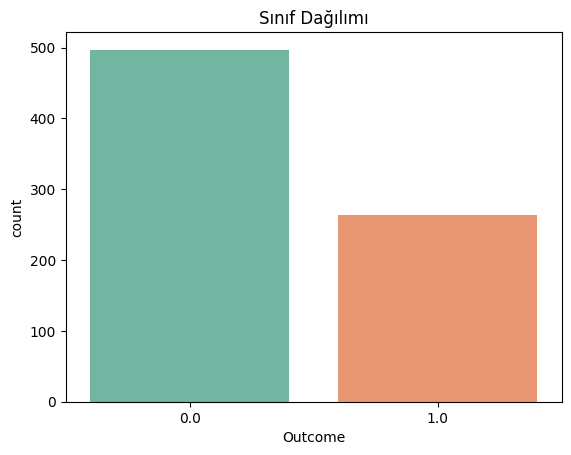

Outcome
0.0    65.308804
1.0    34.691196
Name: proportion, dtype: float64


In [53]:
## whether or not there is diabetes is visualized and ratified
sns.countplot(x="Outcome", data=df, palette="Set2")
plt.title("Sınıf Dağılımı")
plt.show()

# Sınıf oranlarını göster
print(df["Outcome"].value_counts(normalize=True) * 100)


## Her bir özellik dağılım grafiği çizdiriliyor

<Figure size 1200x800 with 0 Axes>

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

<Figure size 1200x800 with 0 Axes>

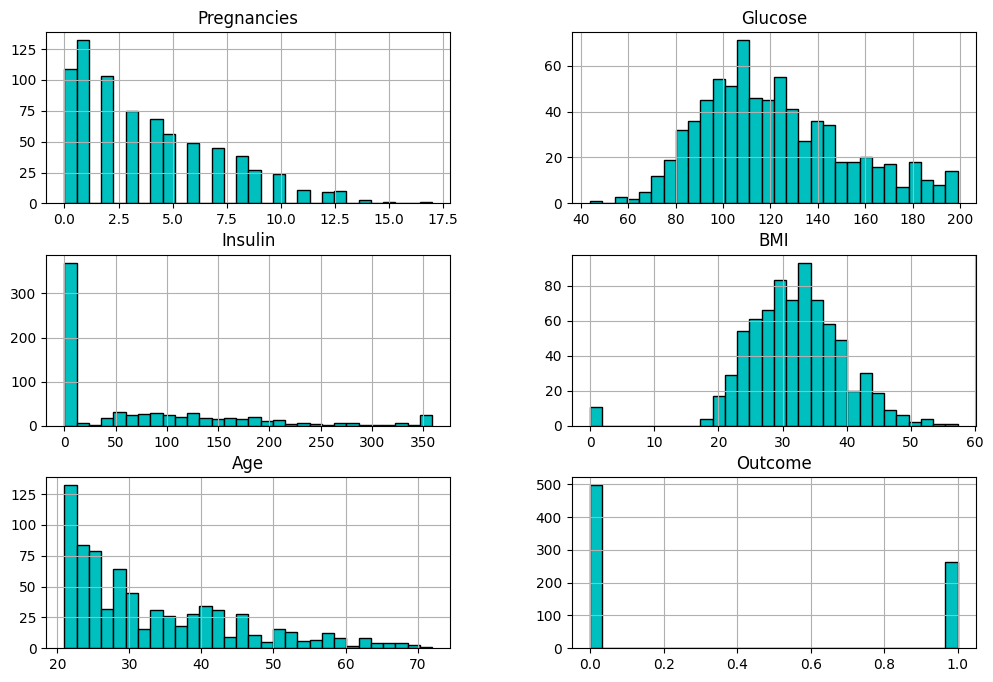

In [54]:
## Each feature is drawn a distribution graph
plt.figure(figsize=(12, 8))
df.hist(figsize=(12, 8), bins=30, color='c', edgecolor='black')
plt.show()

## kutu grafiği ile aykırı değerler tespit ediliyor 

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Kutu Grafikleri (Aykırı Değerler)')

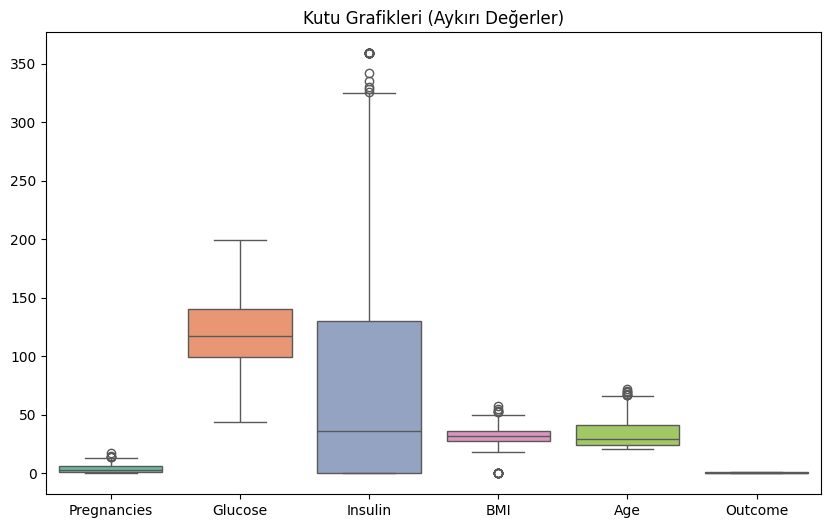

In [55]:
## Values ​​are detected by boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette="Set2")
plt.title("Kutu Grafikleri (Aykırı Değerler)")
plt.show()

## Çelişkili değerler temizlenir IQR (çeyrekler arası aralık) kullanılır

In [56]:
## contradictory values ​​are cleaned IQR (Interquartile Range) is used
def remove_outliers_iqr(df):
    clean_df = df.copy()
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        clean_df = clean_df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return clean_df

df_cleaned = remove_outliers_iqr(df)


C:\Users\Harun\AppData\Local\Temp\ipykernel_18756\2243476937.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
C:\Users\Harun\AppData\Local\Temp\ipykernel_18756\2243476937.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
C:\Users\Harun\AppData\Local\Temp\ipykernel_18756\2243476937.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
C:\Users\Harun\AppData\Local\Temp\ipykernel_18756\2243476937.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
C:\Users\Harun\AppData\Local\Temp\ipykernel_18756\2243476937.py:10: UserWarning: Boolean Series key will be reindexed to mat

In [22]:
df_cleaned

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
8,6,190,0.0,35.5,66,1.0
9,6,114,0.0,27.8,66,0.0
10,6,166,0.0,26.6,66,0.0
11,2,158,0.0,31.6,66,1.0
12,5,147,0.0,33.7,65,0.0
...,...,...,...,...,...,...
756,1,89,25.0,27.8,21,0.0
757,0,94,115.0,43.5,21,0.0
758,1,114,200.0,38.1,21,0.0
759,0,126,120.0,27.4,21,0.0


## Corelasyon Matrixi ile doğrusal ilişki kontrolü için görselleştiriliyor

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Korelasyon Matrisi')

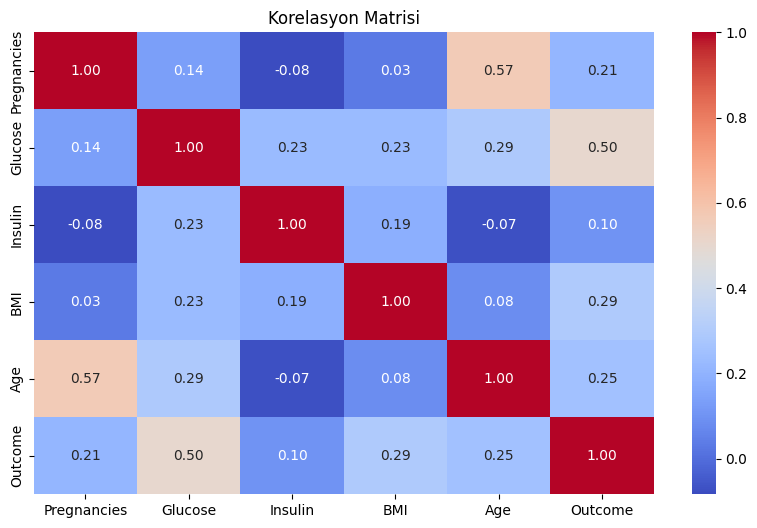

In [57]:
## Visualized for linear relationship control with the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

## hangi değişkenlerin Outcome ile nasıl dağıldığını  anlamak için görselleştirme -- ör: glucose arttıkça outcome durumu  olma ihtimali artıyor

Text(0.5, 1.02, 'Dağılım Grafikleri')

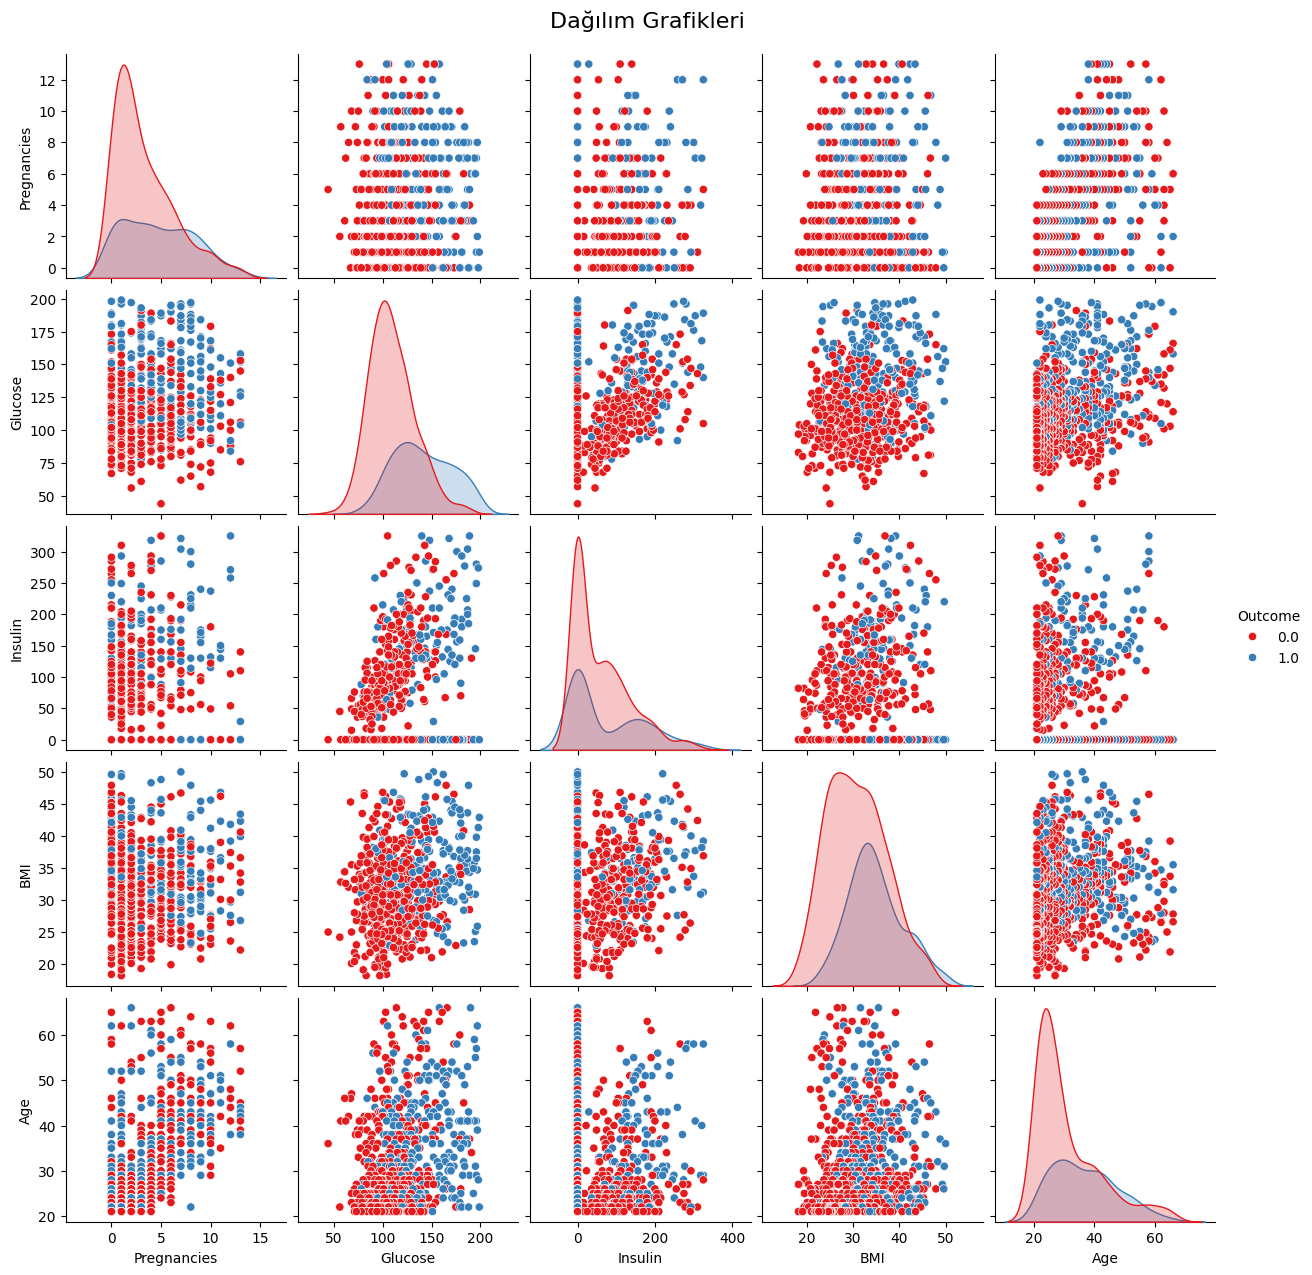

In [58]:
## Visualization to understand how variables are distributed with Outcome - eg: Glucose increases as it increases.
sns.pairplot(df_cleaned, hue="Outcome", palette="Set1")
plt.suptitle("Dağılım Grafikleri", y=1.02, fontsize=16)
plt.show()

## Random forest classifier ile model eğitimi 

In [59]:
## Model Training with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(columns=["Outcome"])  # Bağımsız değişkenler
y = df_cleaned["Outcome"]  # Hedef değişken
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Sonuçları:")
print(classification_report(y_test, y_pred_rf))
print(f"Doğruluk (Accuracy): {accuracy_score(y_test, y_pred_rf):.4f}")

RandomForestClassifier(random_state=42)

Random Forest Sonuçları:
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80        94
         1.0       0.61      0.60      0.60        47

    accuracy                           0.74       141
   macro avg       0.70      0.70      0.70       141
weighted avg       0.74      0.74      0.74       141

Doğruluk (Accuracy): 0.7376


In [40]:
sample_input = np.array([[0,150,100,26.58,21]])  # 2D array olmalı row tahmin ettirdik kendi verileirmi girdim ve diabet değilim 


prediction = rf_model.predict(sample_input)

print(f"Tahmin Edilen Sonuç (Outcome): {prediction[0]}")


Tahmin Edilen Sonuç (Outcome): 0.0


c:\Users\Harun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## veriyi standartlaştırma 

In [60]:
## standardizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df_cleaned.drop(columns=["Outcome"])  # Bağımsız değişkenler
y = df_cleaned["Outcome"]  # Hedef değişken

X_scaled = scaler.fit_transform(X)  # Standartlaştırılmış veri


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


## Destek Vektör Makineleri ile model eğitim ve tahmin 

In [61]:
## support vector machines with model training and estimation
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score



modelSvm = SVC(kernel='linear', random_state=42)
modelSvm.fit(X_train, y_train)
y_pred = modelSvm.predict(X_test)

print("Lojistik Regresyon Sonuçları:")
print(classification_report(y_test, y_pred))
print(f"Doğruluk (Accuracy): {accuracy_score(y_test, y_pred):.4f}")


SVC(kernel='linear', random_state=42)

Lojistik Regresyon Sonuçları:
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82        94
         1.0       0.65      0.55      0.60        47

    accuracy                           0.75       141
   macro avg       0.72      0.70      0.71       141
weighted avg       0.74      0.75      0.75       141

Doğruluk (Accuracy): 0.7518
